# Example Understanding #

In [3]:
# Code for Wavelet Transform Examples

# Import necessary libraries
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import data
from PIL import Image

#  Time Series Wavelet Transform Example 

/Users/emmarusconi/miniconda3/envs/collectiveNematode/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


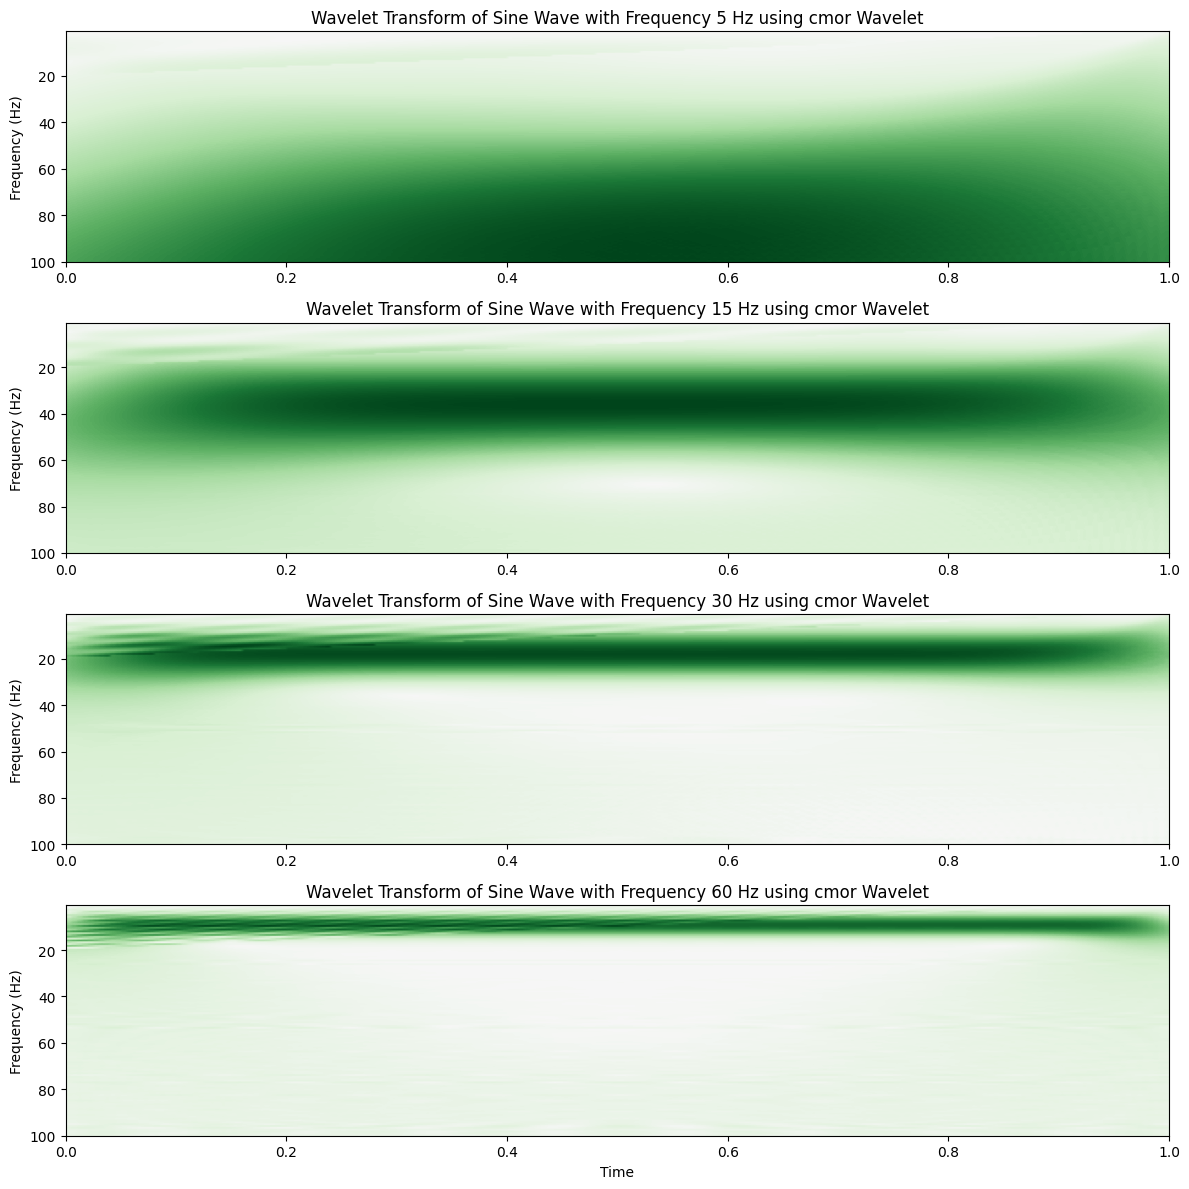

In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def wavelet_transform_time_series(frequency, wavelet_type):
    # Generate a sample time series with specified sine wave frequency
    t = np.linspace(0, 1, 200, endpoint=False)
    sin_wave = np.sin(frequency * t)
    noise = np.random.normal(0, 0.5, sin_wave.shape)
    time_series = sin_wave #+ noise

    # Apply Continuous Wavelet Transform
    scales = np.arange(1, 128)
    coefficients, frequencies = pywt.cwt(time_series, scales, wavelet_type, sampling_period=1/200)

    return coefficients, frequencies

# Frequencies for the sine waves
frequencies = [5, 15, 30, 60]

# Choose a different wavelet type
wavelet_type = 'cmor'  # Replace 'cmor' with 'haar' or another wavelet

# Create subplots
plt.figure(figsize=(12, 12))

for i, freq in enumerate(frequencies, 1):
    coefficients, freqs = wavelet_transform_time_series(freq, wavelet_type)
    
    # Plot the wavelet transform
    plt.subplot(4, 1, i)
    # Setting the yscale to frequencies using the scales provided by the CWT function
    scales = np.arange(1, 128)
    plt.imshow(np.abs(coefficients), extent=[0, 1, freqs[0], freqs[-1]], cmap='PRGn', aspect='auto',
               vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
    plt.title(f'Wavelet Transform of Sine Wave with Frequency {freq} Hz using {wavelet_type} Wavelet')
    plt.ylabel('Frequency (Hz)')

plt.xlabel('Time')
plt.tight_layout()
plt.show()


## Concatenated sine waves of different frequencies ##

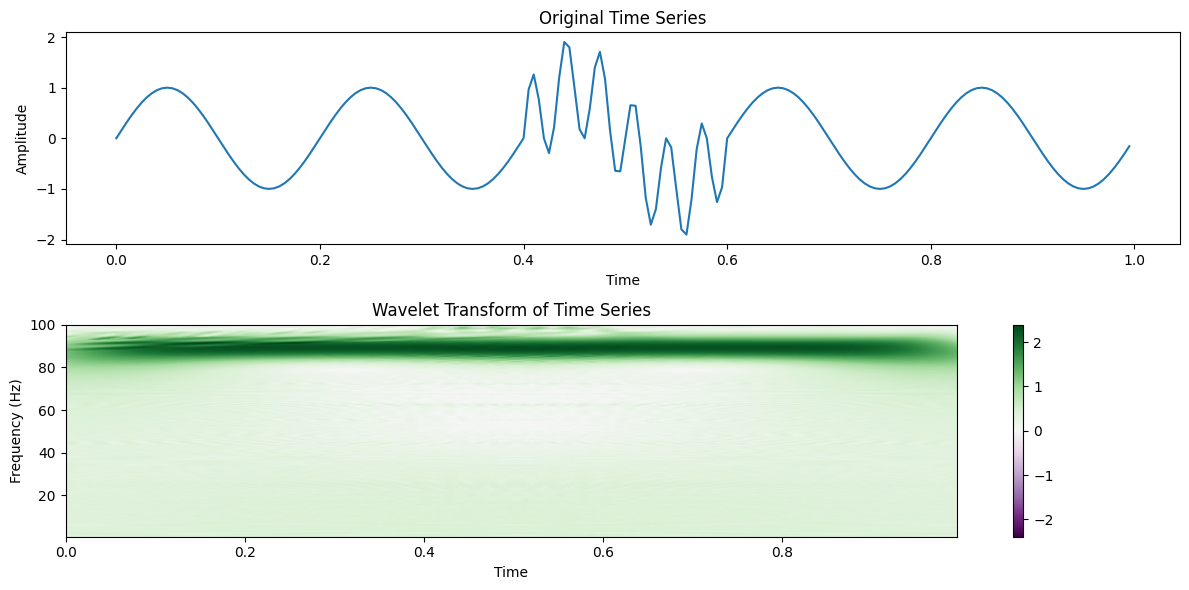

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Function to generate a time series with a sine wave and a higher frequency sine wave in the middle
def generate_time_series(low_freq, high_freq, high_freq_duration, total_duration=1, sampling_rate=200):
    t = np.linspace(0, total_duration, int(total_duration * sampling_rate), endpoint=False)
    # Create the low frequency sine wave
    time_series = np.sin(2 * np.pi * low_freq * t)
    
    # Calculate the start and end points for the high frequency sine wave
    start = int((total_duration - high_freq_duration) / 2 * sampling_rate)
    end = start + int(high_freq_duration * sampling_rate)
    
    # Add the high frequency sine wave in the middle
    time_series[start:end] += np.sin(2 * np.pi * high_freq * t[start:end])
    
    return t, time_series

# Generate the time series
t, time_series = generate_time_series(low_freq=5, high_freq=30, high_freq_duration=0.2)

# Apply Continuous Wavelet Transform
scales = np.arange(1, 200)
coefficients, frequencies = pywt.cwt(time_series, scales, 'cmor', sampling_period=1/200)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the original time series
plt.subplot(2, 1, 1)
plt.plot(t, time_series)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the wavelet transform
plt.subplot(2, 1, 2)
plt.imshow(np.abs(coefficients), extent=[0, t[-1], frequencies[-1], frequencies[0]], cmap='PRGn', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.title('Wavelet Transform of Time Series')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar()

plt.tight_layout()
plt.show()


#  Image Wavelet Transform Example #

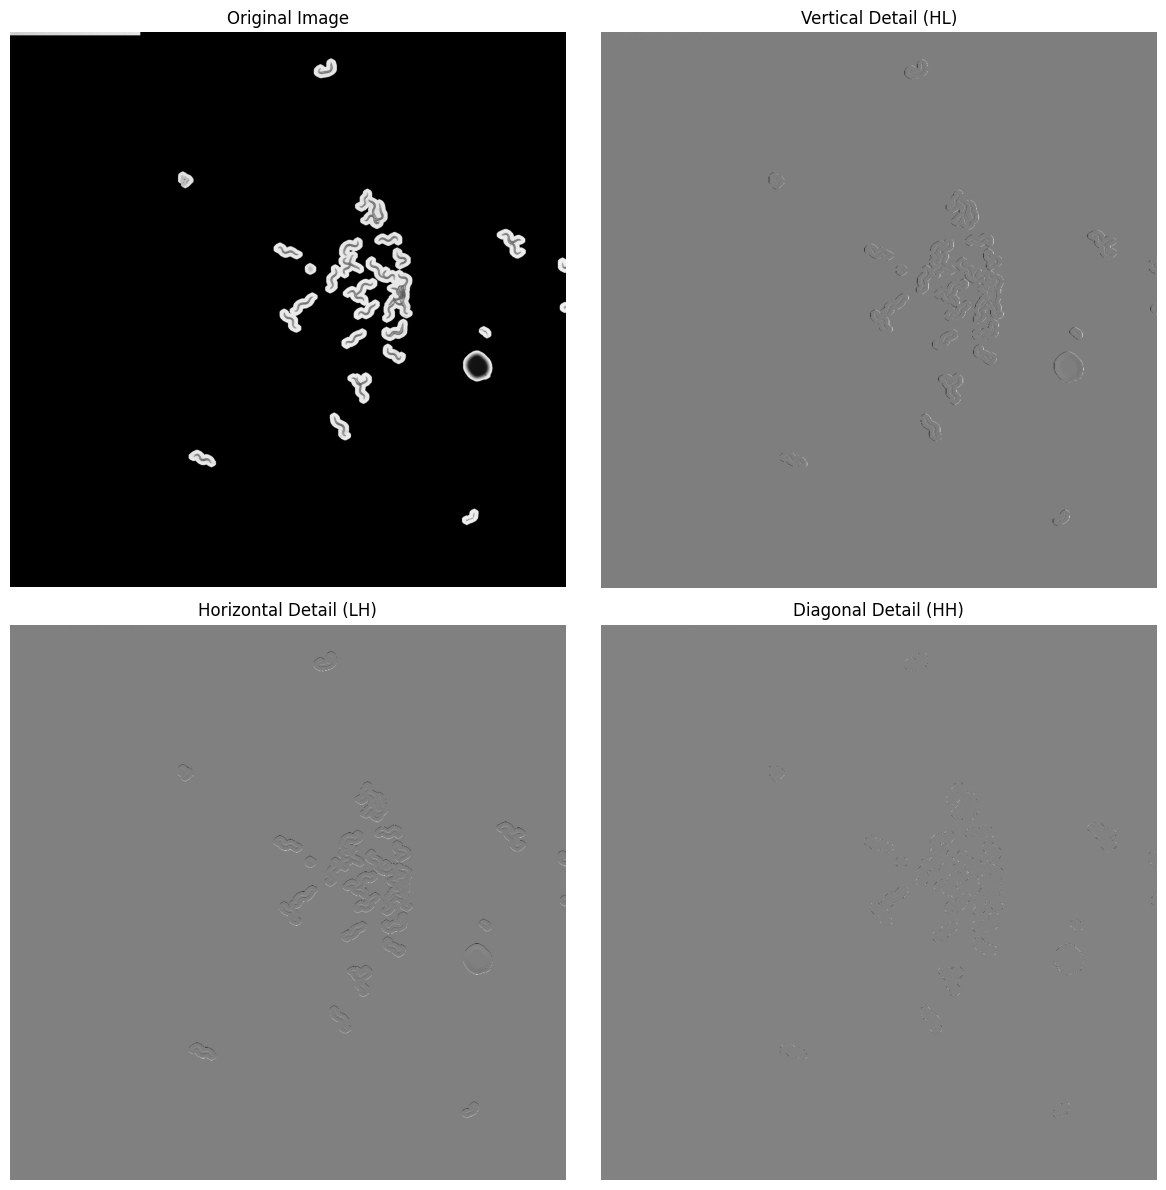

Approximation Coefficients (LL):
       0      1      2      3      4      5      6      7      8      9     \
0     185.0  181.0  185.5  182.0  182.5  181.0  180.0  183.5  184.0  181.5   
1     186.5  184.0  188.5  187.5  186.5  186.5  187.5  186.5  187.5  183.0   
2     186.5  185.0  190.0  188.0  187.5  185.0  187.0  189.5  188.0  185.5   
3     184.5  189.0  187.5  186.5  188.0  189.5  188.0  187.5  185.0  184.0   
4     188.5  186.0  189.5  184.5  186.5  186.0  184.0  187.5  185.0  184.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1019    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1020    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1021    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1022    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1023    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  1014  1015  1016  1

In [50]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

def wavelet_transform_image():
    # Load a sample image
    # Load an image from the specified path
    image = Image.open('/Users/emmarusconi/Desktop/003500.jpg')
    image = np.array(image)

    # Apply 2D Discrete Wavelet Transform
    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2

    # Visualize the original image and its decomposition
    plt.figure(figsize=(12, 12))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Approximation coefficients
    plt.subplot(2, 2, 2)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')
    plt.axis('off')

    # Horizontal detail coefficients
    plt.subplot(2, 2, 3)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')
    plt.axis('off')

    # Vertical detail coefficients
    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Convert coefficients to pandas DataFrames for a nicer display
    print("Approximation Coefficients (LL):")
    print(pd.DataFrame(LL))

    print("\nHorizontal Detail Coefficients (LH):")
    print(pd.DataFrame(LH))

    print("\nVertical Detail Coefficients (HL):")
    print(pd.DataFrame(HL))

    print("\nDiagonal Detail Coefficients (HH):")
    print(pd.DataFrame(HH))

# Call the functions to run the examples
wavelet_transform_image()



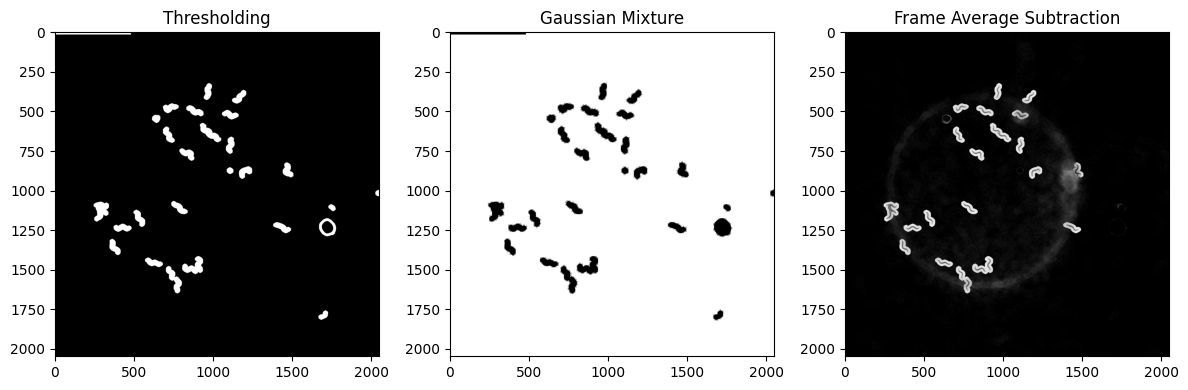

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def apply_thresholding(image_path, threshold=30):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresh_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thresh_image

def apply_gaussian_mixture(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgmask = fgbg.apply(image)
    return fgmask

def apply_frame_average_subtraction(image_path, frames_folder, n_frames=100):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    frame_paths = glob.glob(os.path.join(frames_folder, '*.jpg'))[:n_frames]
    avg_frame = np.zeros_like(image, dtype=float)

    for path in frame_paths:
        frame = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        avg_frame += frame / n_frames

    subtracted_frame = cv2.absdiff(image.astype('float'), avg_frame).astype('uint8')
    return subtracted_frame

# Path to the frame and the folder containing video frames
frame_path = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_3_cb4856_oo_Set0_Pos0_Ch3_14012018_114743/067500.jpg'  # example frame
frames_folder = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_3_cb4856_oo_Set0_Pos0_Ch3_14012018_114743'

# Apply the three background subtraction methods
thresholded_image = apply_thresholding(frame_path)
gaussian_mixture_image = apply_gaussian_mixture(frame_path)
frame_average_subtracted_image = apply_frame_average_subtraction(frame_path, frames_folder)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholding')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_mixture_image, cmap='gray')
plt.title('Gaussian Mixture')

plt.subplot(1, 3, 3)
plt.imshow(frame_average_subtracted_image, cmap='gray')
plt.title('Frame Average Subtraction')

plt.tight_layout()
plt.show()


Trying now to implement first the Frame average subtraction and then the thresholding on that 

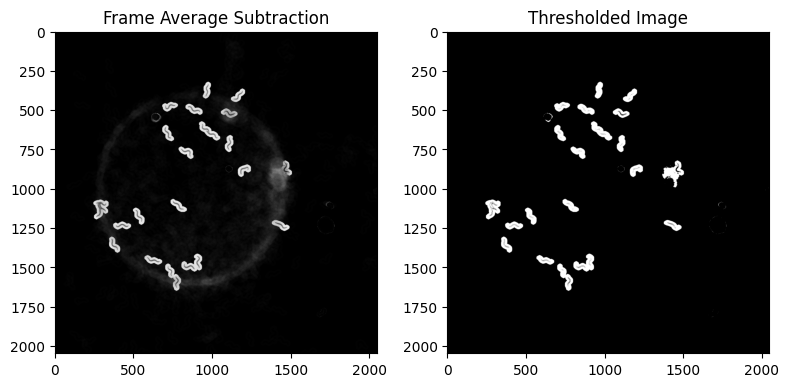

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def apply_frame_average_subtraction(image_path, frames_folder, n_frames=100):
    # Load the target image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Target image could not be loaded.")

    # Get frame paths and initialize average frame
    frame_paths = glob.glob(os.path.join(frames_folder, '*.jpg'))[:n_frames]
    avg_frame = np.zeros_like(image, dtype=float)

    # Iterate over frame paths
    for path in frame_paths:
        frame = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if frame is not None and frame.shape == image.shape:
            avg_frame += frame / n_frames
        else:
            raise ValueError(f"Frame at {path} could not be loaded or has mismatched size.")

    # Subtract average frame from target image
    subtracted_frame = cv2.absdiff(image.astype('float'), avg_frame).astype('uint8')
    return subtracted_frame

def apply_thresholding(image, threshold=35):
    _, thresh_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thresh_image

# Path to the frame and the folder containing video frames
frame_path = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_3_cb4856_oo_Set0_Pos0_Ch3_14012018_114743/067500.jpg'
frames_folder = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_3_cb4856_oo_Set0_Pos0_Ch3_14012018_114743'

try:
    # Apply Frame Average Subtraction
    frame_average_subtracted_image = apply_frame_average_subtraction(frame_path, frames_folder)

    # Apply Thresholding on the result of Frame Average Subtraction
    thresholded_image = apply_thresholding(frame_average_subtracted_image)

    # Plotting
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(frame_average_subtracted_image, cmap='gray')
    plt.title('Frame Average Subtraction')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title('Thresholded Image')

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(e)


Tresholding --> average background subtraction 

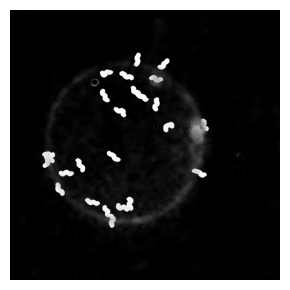

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def apply_thresholding(image, threshold=20):
    _, thresh_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thresh_image

def apply_frame_average_subtraction(image_path, frames_folder, n_frames=100, threshold=30):
    # Load the target image and apply thresholding
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Target image could not be loaded.")
    image = apply_thresholding(image, threshold)

    # Get frame paths and initialize average frame
    frame_paths = glob.glob(os.path.join(frames_folder, '*.jpg'))[:n_frames]
    avg_frame = np.zeros_like(image, dtype=float)

    # Iterate over frame paths and apply thresholding
    for path in frame_paths:
        frame = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if frame is not None and frame.shape == image.shape:
            thresh_frame = apply_thresholding(frame, threshold)
            avg_frame += thresh_frame / n_frames
        else:
            raise ValueError(f"Frame at {path} could not be loaded or has mismatched size.")

    # Subtract average frame from the thresholded target image
    subtracted_frame = cv2.absdiff(image.astype('float'), avg_frame).astype('uint8')
    return subtracted_frame

# Path to the frame and the folder containing video frames
frame_path = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_3_cb4856_oo_Set0_Pos0_Ch3_14012018_114743/067500.jpg'
frames_folder = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_3_cb4856_oo_Set0_Pos0_Ch3_14012018_114743'

try:
    # Apply Frame Average Subtraction
    frame_average_subtracted_image = apply_frame_average_subtraction(frame_path, frames_folder)

    # Plotting
    plt.figure(figsize=(6, 3))

    plt.imshow(frame_average_subtracted_image, cmap='gray')
    # plt.title('Thresholded Frame Average Subtraction')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(e)


## 1D Wavelet transform application to 1D frames ##

Steps: 

1. Load the image and convert it to a 1D vector.
2. Apply the 1D Discrete wavelet transform.
3. Plot the wavelet coefficients.

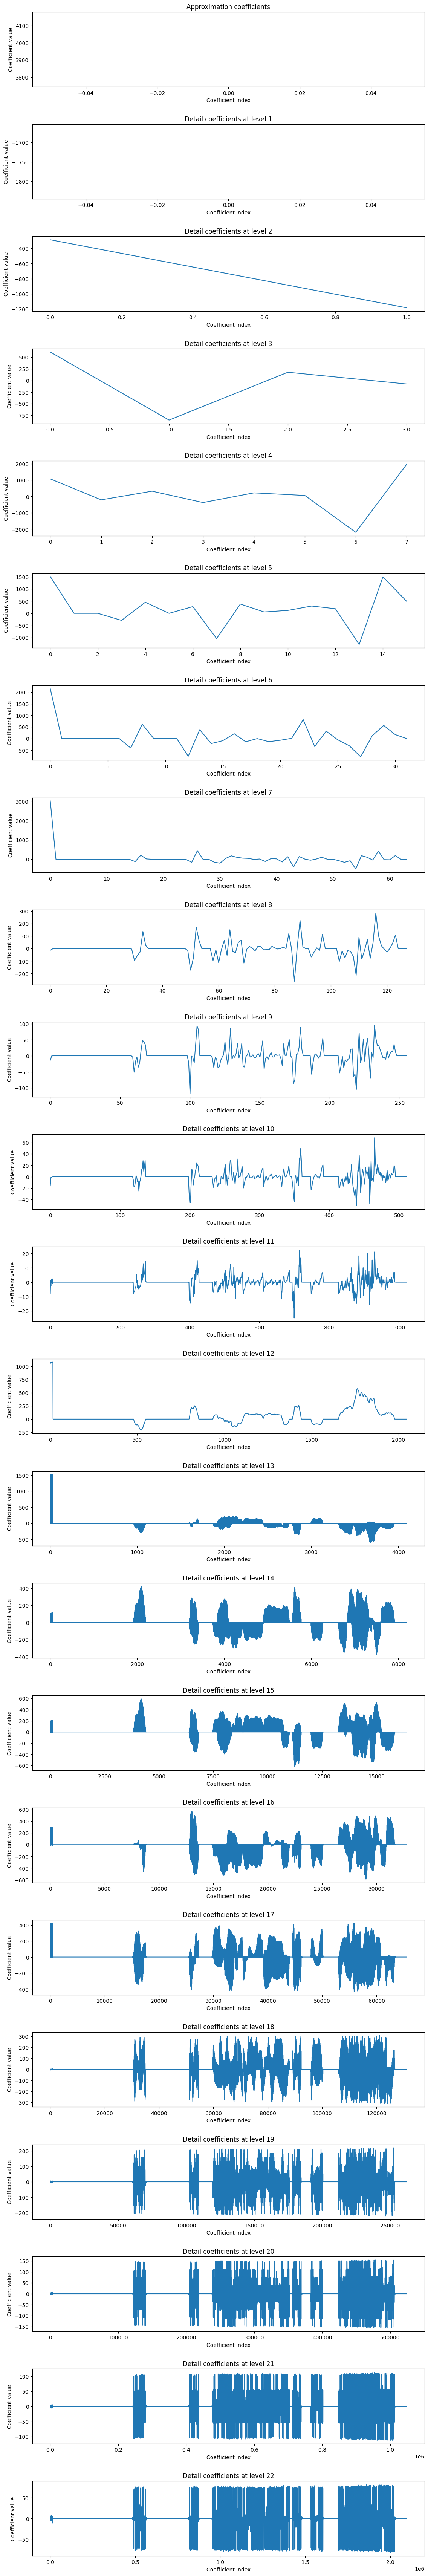

In [12]:
import pywt
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path to your frame image
image_path = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/CB4856/1.1_7_cb4856_oo_ju830_b5_Set0_Pos0_Ch3_14012018_162612/066500.jpg'

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to a 1D vector
vector = image.flatten()

# Perform the Discrete Wavelet Transform (DWT)
coefficients = pywt.wavedec(vector, 'db1')  # 'db1' denotes Daubechies wavelet with 1 vanishing moment

# Calculate the number of subplots based on the decomposition levels
n_subplots = len(coefficients)

# Create subplots
fig, axes = plt.subplots(n_subplots, 1, figsize=(12, 3 * n_subplots))

# Plot the approximation and detail coefficients
for i, coef in enumerate(coefficients):
    ax = axes[i]
    ax.plot(coef)
    if i == 0:
        ax.set_title('Approximation coefficients')
    else:
        ax.set_title(f'Detail coefficients at level {i}')
    ax.set_xlabel('Coefficient index')
    ax.set_ylabel('Coefficient value')

# Adjust layout to prevent overlap
fig.tight_layout(pad=3.0)

# Adjust subplot parameters for better spacing
plt.subplots_adjust(hspace=0.5)

plt.show()


In [13]:
import cv2
import numpy as np
import pywt


# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to a 1D vector
vector = image.flatten()

# Perform the Discrete Wavelet Transform (DWT)
# Here, 'db1' is used as the wavelet, which is the Daubechies wavelet with 1 vanishing moment.
# You can choose different wavelets based on your requirements.
coefficients = pywt.wavedec(vector, 'db1')

# coefficients is a list of arrays, where each array is a set of coefficients at a different level of decomposition.
# The first element of the list (coefficients[0]) is the approximation coefficients array,
# and the subsequent elements are detail coefficients arrays.

# For demonstration, let's print the shape of each coefficients array
for i, coef in enumerate(coefficients):
    print(f"Level {i}: {coef.shape}")

# You can now use these coefficients for further processing or analysis.


Level 0: (1,)
Level 1: (1,)
Level 2: (2,)
Level 3: (4,)
Level 4: (8,)
Level 5: (16,)
Level 6: (32,)
Level 7: (64,)
Level 8: (128,)
Level 9: (256,)
Level 10: (512,)
Level 11: (1024,)
Level 12: (2048,)
Level 13: (4096,)
Level 14: (8192,)
Level 15: (16384,)
Level 16: (32768,)
Level 17: (65536,)
Level 18: (131072,)
Level 19: (262144,)
Level 20: (524288,)
Level 21: (1048576,)
Level 22: (2097152,)
